In [112]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score,adjusted_rand_score,root_mean_squared_error
from sklearn.datasets import load_diabetes

In [113]:
! pip install datasets


In [114]:
diabetes = load_diabetes()

In [115]:
from datasets import load_dataset

# Load the dataset
ds = load_dataset("marianeft/diabetes_prediction_dataset")


In [116]:
ds

DatasetDict({
    train: Dataset({
        features: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
        num_rows: 100000
    })
})

In [117]:
diabetes 

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [118]:
df=pd.DataFrame(diabetes.data, columns=diabetes.feature_names)



In [119]:
df['target'] = diabetes.target

In [120]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [121]:
x=df.drop(columns=['target'] )

In [122]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [123]:
y=df['target']

In [124]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [125]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [126]:
x_train_scaled

array([[ 1.49836523,  1.06136988,  0.21990201, ...,  0.71103773,
         0.54748197, -0.06144896],
       [-0.22885822,  1.06136988, -0.41936607, ...,  1.4842858 ,
        -0.01975653,  0.36723647],
       [ 0.08518241, -0.94217861,  1.01898711, ..., -0.06221033,
         0.3312366 , -0.31866022],
       ...,
       [ 0.63475351, -0.94217861, -0.46502808, ..., -0.83545839,
        -0.25375196, -0.06144896],
       [-0.30736838, -0.94217861, -0.53352109, ..., -0.06221033,
        -0.83072436, -0.83308273],
       [-2.03459183, -0.94217861,  0.56236706, ..., -0.83545839,
        -0.13312789, -0.06144896]])

In [127]:
x_test_scaled

array([[ 9.48794133e-01, -9.42178611e-01, -1.68225039e-01,
        -3.54924745e-01,  2.63158584e+00,  2.64916600e+00,
         4.29486950e-01,  7.11037735e-01,  6.53600610e-01,
        -1.47186045e-01],
       [ 1.96942617e+00, -9.42178611e-01,  7.45015079e-01,
         4.27541124e-01, -5.11434037e-01, -3.33282444e-01,
         3.76314490e-02, -8.35458386e-01, -4.96908703e-01,
        -4.90134388e-01],
       [ 1.34134492e+00,  1.06136988e+00, -1.22563033e-01,
        -2.83791484e-01,  2.17022512e+00,  1.04272578e+00,
         1.21319795e+00, -6.22103255e-02,  1.74360703e+00,
        -4.04397302e-01],
       [ 2.04793633e+00, -9.42178611e-01,  1.06464912e+00,
         1.61333258e+00,  1.16099856e+00,  7.85958692e-01,
        -1.60816166e+00,  2.95345711e+00,  2.04001396e+00,
         1.22460733e+00],
       [ 2.42202722e-01,  1.06136988e+00, -4.65028077e-01,
        -7.03917017e-02,  8.14978020e-01,  1.13489858e+00,
        -1.19110751e-01,  7.11037735e-01, -1.33127889e-01,
        -2.

In [128]:
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)



In [129]:
ridge_model.fit(x_train_scaled, y_train)   

Ridge()

In [130]:
lasso_model.fit(x_train_scaled, y_train)



Lasso()

In [131]:
y_pred_ridge = ridge_model.predict(x_test_scaled)
y_pred_ridge

array([139.86277405, 179.9582406 , 135.71687469, 292.11578228,
       123.18931464,  92.63420961, 257.85540931, 182.98437571,
        88.57110276, 109.34130188,  94.44005222, 166.79559349,
        56.34471823, 206.28537014,  99.83697447, 131.14352119,
       220.13422127, 249.66324991, 196.24491272, 217.48836765,
       207.27026897,  88.62662434,  71.00067256, 188.77371926,
       155.27179344, 160.11509377, 188.68359243, 179.4462606 ,
        48.58194512, 109.46862532, 176.30864771,  87.81175183,
       132.57482949, 183.48671555, 173.64887924, 190.57967229,
       123.89852066, 119.22466026, 147.3190418 ,  59.64849436,
        72.53769889, 107.79400092, 164.47289681, 153.51402972,
       172.19580463,  62.65517635,  73.5923177 , 112.86223345,
        53.52690481, 165.85907297, 153.72729198,  63.69903686,
       106.37934882, 108.94605495, 174.12346145, 156.07183591,
        94.49282843, 209.90083637, 119.67133314,  75.31549064,
       187.08319266, 205.38638319, 140.93273277, 105.55

In [132]:
y_pred_lasso = lasso_model.predict(x_test_scaled)
y_pred_lasso

array([144.57023028, 178.81110506, 146.73567504, 280.88957847,
       124.03909694,  97.50249878, 259.67789975, 194.71873825,
        88.3919044 , 118.01101696,  99.19043541, 159.27292039,
        65.55308084, 205.14809807, 101.74721056, 133.22589431,
       222.18296422, 242.78029407, 194.42813441, 213.25114497,
       208.35770698,  90.11574615,  71.05984547, 190.39472477,
       158.87131914, 162.15483057, 190.61003589, 173.36685377,
        51.82544349, 115.67752438, 178.68551235,  92.88560262,
       136.60336668, 179.57402381, 171.21011118, 200.80798743,
       125.65645075, 121.91151049, 145.17830531,  60.59819277,
        72.85152207, 108.69104169, 161.10624053, 144.39331843,
       174.05133453,  67.30989032,  80.11398941, 102.82187412,
        57.69725661, 161.83449653, 156.57888261,  69.9406521 ,
       111.54468605, 106.8109581 , 171.96116585, 160.43315235,
        95.13421852, 207.88273395, 120.57955489,  67.88452473,
       184.96126993, 201.72008257, 144.70280481, 107.34

In [133]:
mean_squared_error_ridge = mean_squared_error(y_test, y_pred_ridge)
mean_squared_error_ridge

2892.0145657501726

In [134]:
mean_squared_error_lasso = mean_squared_error(y_test, y_pred_lasso)
mean_squared_error_lasso

2824.568094049959

In [135]:
r2_score_ridge = r2_score(y_test, y_pred_ridge)
r2_score_ridge

0.45414652070698225

In [136]:
r2_score_lasso = r2_score(y_test, y_pred_lasso)
r2_score_lasso

0.46687670944102466

In [137]:
ajuste_r2_score_ridge = 1 - (1 - r2_score_ridge) * (len(y_test) - 1) / (len(y_test) - x_test_scaled.shape[1] - 1)
ajuste_r2_score_ridge

0.38416530541300553

In [138]:
adjuste_r2_score_lasso = 1 - (1 - r2_score_lasso) * (len(y_test) - 1) / (len(y_test) - x_test_scaled.shape[1] - 1)
adjuste_r2_score_lasso

0.3985275696257714

In [139]:
rmse_ridge = np.sqrt(mean_squared_error_ridge)
rmse_ridge

np.float64(53.777454065343896)

In [140]:
rmse_lasso = np.sqrt(mean_squared_error_lasso)
rmse_lasso

np.float64(53.14666587896139)

In [180]:
import pickle
with open('DiabetesRidge.pkl', 'wb') as file:   
    pickle.dump((ridge_model,scaler),file) 

In [181]:
import pickle
with open('DiabetesLasso.pkl', 'wb') as file:   
    pickle.dump((lasso_model,scaler),file) 

Polynomial Regression


In [153]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt


In [154]:
df = pd.read_csv(r"D:\Euron\ML\class2\dataset\Ice-cream-selling-data-csv_6UnYJ.csv")

In [155]:
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


In [156]:
df.columns

Index(['Temperature (°C)', 'Ice Cream Sales (units)'], dtype='object')

In [157]:
x=df[["Temperature (°C)"]].values
y=df[["Ice Cream Sales (units)"]].values

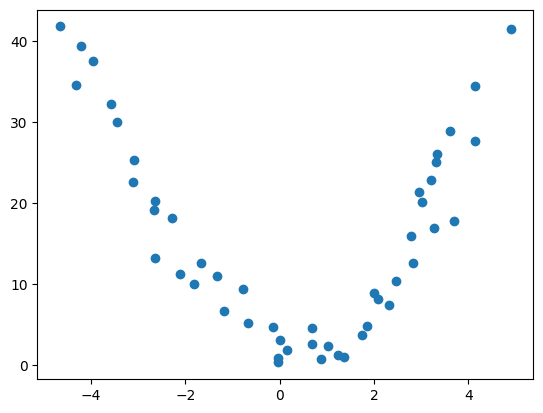

In [158]:
plt.scatter(x, y)

In [159]:
x=df[["Temperature (°C)"]].values
y=df[["Ice Cream Sales (units)"]].values
poly_model1=make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
poly_model2=make_pipeline(PolynomialFeatures(degree=4),LinearRegression())
poly_model3=make_pipeline(PolynomialFeatures(degree=5),LinearRegression())
poly_model4=make_pipeline(PolynomialFeatures(degree=6),LinearRegression())
poly_model5=make_pipeline(PolynomialFeatures(degree=7),LinearRegression())
poly_model1.fit(x,y)
poly_model2.fit(x,y)
poly_model3.fit(x,y)
poly_model4.fit(x,y)
poly_model5.fit(x,y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

In [160]:
y_pred1 = poly_model1.predict(x)
y_pred2 = poly_model2.predict(x)
y_pred3 = poly_model3.predict(x)
y_pred4 = poly_model4.predict(x)
y_pred5 = poly_model5.predict(x)

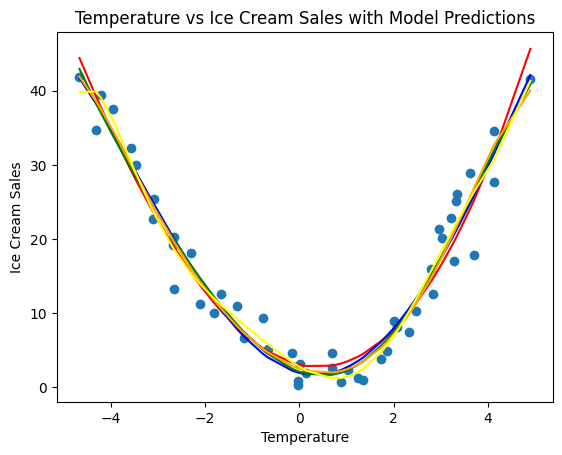

In [161]:
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Sales")
plt.title("Temperature vs Ice Cream Sales with Model Predictions")
plt.scatter(x, y)
plt.plot(x,y_pred1,color="red")
plt.plot(x,y_pred2,color="blue")
plt.plot(x,y_pred3,color="green")
plt.plot(x,y_pred4,color="orange")
plt.plot(x,y_pred5,color="yellow")


In [ ]:
r2_score(x,y_pred1)


-55.55840287196668

In [164]:
r2_score(x,y_pred2)


-55.385971006805946

In [165]:
r2_score(x,y_pred3)


-55.41569243145608

In [166]:
r2_score(x,y_pred4)


-55.438703289285954

In [ ]:
r2_score(x,y_pred5)

In [167]:
mean_squared_error(x,y_pred1)

400.91796378855406

In [172]:
mean_squared_error(x,y_pred2)

401.97067291927857

In [175]:
mean_squared_error(x,y_pred3)


402.18255436520224

In [ ]:
mean_squared_error(x,y_pred4)

402.18255436520224

In [176]:
mean_squared_error(x,y_pred5)

403.19992465749937

In [182]:
import pickle
data_to_save = {
    "model1":poly_model1,
    "model2":poly_model2,
    "model3":poly_model3,
    "model4":poly_model4,
    "model5":poly_model5,
    "pred1":y_pred1,
    "pred2":y_pred2,
    "pred3":y_pred3,
    "pred4":y_pred4,
    "pred5":y_pred5,
}

# Save to a pickle file
with open("polynomial_models_and_predictions.pkl", "wb") as file:
    pickle.dump(data_to_save, file)

print("✅ Models and predictions saved successfully.")

✅ Models and predictions saved successfully.
